In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
!ls

analyze-reduced-database.ipynb  silva_nr99_v138.1_wSpecies_train_set.fa
asv.fasta                       silva_nr99_v138.1_wSpecies_train_set-v4.fa
cut-primers.py                  taxa.csv
primer-locs.tsv                 v4-primers.fa
README.org                      v4-primers-rev.fa


In [4]:
df = pd.read_table("primer-locs.tsv")
df.head()

,#seqname,desc,primer_index,primer_name,position,mismatches,seq_primer_region
0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,NaN,1,515f,528,0,GTGCCAGCAGCCGCGGTAA
1,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,NaN,2,806r,801,3,ATTAGATACCCTGGTAGTCC
2,Bacteria;Proteobacteria;Gammaproteobacteria;En...,NaN,1,515f,702,0,GTGCCAGCAGCCGCGGTAA
3,Bacteria;Proteobacteria;Gammaproteobacteria;En...,NaN,2,806r,975,3,ATTAGATACCCTGGTAGTCC
4,Bacteria;Actinobacteriota;Actinobacteria;Actin...,NaN,1,515f,417,0,GTGCCAGCAGCCGCGGTAA


In [5]:
len(df)

904128

/home/jvkersch/miniconda3/envs/data-analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/jvkersch/miniconda3/envs/data-analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


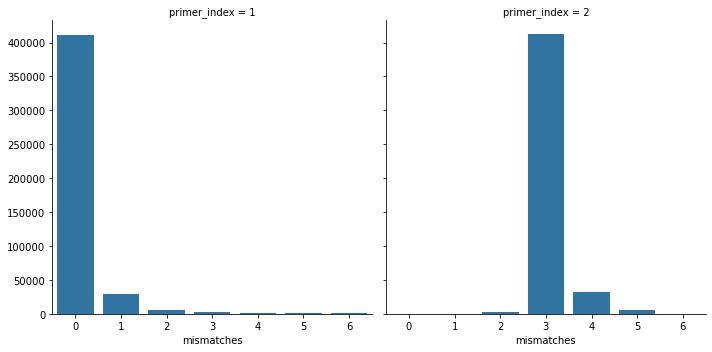

In [6]:
g = sns.FacetGrid(data=df, col="primer_index", size=5)
g.map(sns.countplot, "mismatches")

In [7]:
df[df.primer_index == 2].seq_primer_region.iloc[:100].value_counts()

ATTAGATACCCTGGTAGTCC    90
CTTAGATACCCTGGTAGTCC     3
ATTAGATACCCCGGTAGTCC     2
ATTAGAGACCCTGGTAGTCC     1
ATTAGATACCCCTGTAGTCC     1
ATTAGATAACCTGGTAGTCC     1
ATTAGATACCCTAGTAGTCC     1
GATTAGATACCTGGTAGTAC     1
Name: seq_primer_region, dtype: int64

In [8]:
# W = AT, D = AGT, B = CGT
print("ATTAGATACCCTGGTAGTCC")
print("ATTAGAWADDDBDGTAGTCC")

ATTAGATACCCTGGTAGTCC
ATTAGAWADDDBDGTAGTCC


In [9]:
any(df.loc[df.primer_index == 1, '#seqname'].to_numpy() != df.loc[df.primer_index == 2, '#seqname'].to_numpy())

False

In [10]:
df.memory_usage().sum() / 1000 / 1000

50.631296

In [12]:
# Switch to a wide dataframe. We don't do this with a join, which would exhaust the 
# available memory. Instead, we rely on the fact that fwd/rev rows are interleaved.

df_1 = df[df.primer_index == 1]
df_2 = df[df.primer_index == 2]

seqname = df_1["#seqname"].to_numpy()
pos_1 = df_1["position"].to_numpy()
pos_2 = df_2["position"].to_numpy()
mismatches_1 = df_1["mismatches"].to_numpy()
mismatches_2 = df_2["mismatches"].to_numpy()

df_wide = pd.DataFrame(data={
    "position_1": pos_1,
    "position_2": pos_2,
    "mismatches_1": mismatches_1,
    "mismatches_2": mismatches_2}, index=seqname)

In [13]:
df_wide.head()

,position_1,position_2,mismatches_1,mismatches_2
Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;amygdali;,528,801,0,3
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Pectobacteriaceae;Dickeya;phage;,702,975,0,3
Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332;,417,688,0,3
Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;equi;,495,767,0,4
Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;porcinus;,524,796,0,3


In [14]:
df_wide["v4_length"] = df_wide["position_2"] - df_wide["position_1"] - len("GTGCCAGCMGCCGCGGTAA")

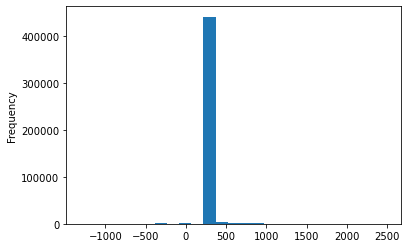

In [16]:
v4_length = df_wide.v4_length
v4_length.plot.hist(bins=25);

In [17]:
v4_length.median()

254.0

In [18]:
df_wide_filtered = df_wide.loc[(v4_length > 250) & (v4_length < 300)]

In [19]:
len(df_wide_filtered)

435008

In [20]:
df_wide_filtered.head()

,position_1,position_2,mismatches_1,mismatches_2,v4_length
Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;amygdali;,528,801,0,3,254
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Pectobacteriaceae;Dickeya;phage;,702,975,0,3,254
Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332;,417,688,0,3,252
Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;equi;,495,767,0,4,253
Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;porcinus;,524,796,0,3,253


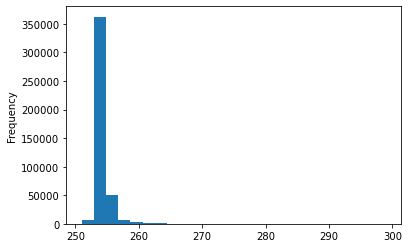

In [22]:
v4_length_filtered = df_wide_filtered.v4_length
v4_length_filtered.plot.hist(bins=25);

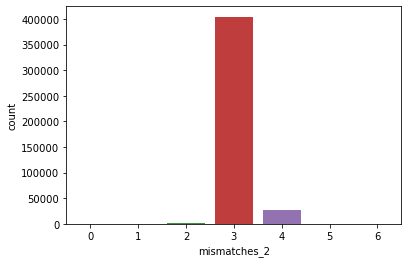

In [23]:
sns.countplot(x=df_wide_filtered.mismatches_2);